# Evaluate Molecular Generation Results

In [ ]:
#ssh -L 8090:localhost:8090 c008

In [ ]:
!conda env list

## compare the of csv and hdf files

In [2]:
csv_path = "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_sascore/results/ZINC_BB_Q99685_SASCORE_results.csv"

# load csv but dont read the trees column with pandas
import pandas 
csv_result = pandas.read_csv(csv_path, usecols = ["target","search_time","first_solution_time","first_solution_iteration","number_of_nodes","max_transforms","max_children","number_of_routes","number_of_solved_routes","top_score","is_solved","number_of_steps","number_of_precursors","number_of_precursors_in_stock","precursors_in_stock","precursors_not_in_stock","precursors_availability","policy_used_counts","profiling","top_scores"])
csv_result.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,is_solved,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores
0,CSc1ccc(CC2CCN(C(=O)c3cccc(C(F)(F)F)c3)CC2)cc1,3.213158,3.213095,1,7,6,1,1,1,0.955960,True,6,4,4,"O=C(O)c1cccc(C(F)(F)F)c1, CC(C)(C)OC(=O)OC(=O)...",NaN,zinc;zinc;zinc;zinc,{'uspto': 6},"{'expansion_calls': 6, 'reactants_generations'...","0.9560, 0.6583, 0.6468, 0.5226, 0.5190"
1,O=C(c1ccc(OCCN2CCCCC2)cc1)N(c1ccccc1)c1cccc(O)c1,17.072852,17.072788,8,150,10,9,77,1,0.975000,True,4,3,3,"OCCN1CCCCC1, COc1ccc(C(=O)Cl)cc1, COc1cccc(Nc2...",NaN,zinc;zinc;zinc,{'uspto': 149},"{'expansion_calls': 73, 'reactants_generations...","0.9750, 0.6774, 0.6699, 0.6699, 0.6583, 0.6583"
2,CC(C)(C)OC(=O)N1CCN(C(=O)N2CCSCC2)CC1c1ccc(Cl)cc1,33.570369,33.570298,16,195,10,16,43,1,0.952371,True,7,5,5,"O=C(Cl)N1CCSCC1, CC(C)(C)OC(=O)OC(=O)OC(C)(C)C...",NaN,zinc;zinc;zinc;zinc;zinc,{'uspto': 194},"{'expansion_calls': 154, 'reactants_generation...","0.9524, 0.7918, 0.7603, 0.7603, 0.7601, 0.7601"
3,O=C(NC1CCN(S(=O)(=O)c2ccc(Cl)cc2)CC1)c1ccccc1,9.213248,9.213175,10,36,5,14,14,1,0.963447,True,5,3,3,"O=C(Cl)c1ccccc1, CC(C)(C)OC(=O)NC1CCNCC1, Nc1c...",NaN,zinc;zinc;zinc,{'uspto': 35},"{'expansion_calls': 31, 'reactants_generations...","0.9634, 0.7565, 0.7565, 0.7491, 0.7491"
4,O=Cn1nnc(Nc2cc(-c3ccccc3)ccc2O)n1,900.557028,0.000000,0,3977,10,28,1105,0,0.833621,False,7,8,7,"Brc1ccccc1, CC(C)(O)C(C)(C)O, BrCc1ccccc1, CC(...",O=Cn1nnc(O)n1,zinc;zinc;zinc;zinc;zinc;zinc;Not in stock;zinc,{'uspto': 3976},"{'expansion_calls': 2972, 'reactants_generatio...","0.8336, 0.8336, 0.8336, 0.8336, 0.8336, 0.8336..."


In [ ]:
from multiretro.utils.io import DataReader

from typing import List

def load_values(paths: List[str], key: str = "table"):
    joined_df = None
    for path in paths:
        data_hdf = DataReader.load_hdf(path, key= key)
        if joined_df is None:
            joined_df = data_hdf
        else:
            joined_df = joined_df.append(data_hdf)
            
        joined_df.reset_index(drop=True, inplace=True)
    print(joined_df.columns)
    return joined_df

In [4]:
result_hdf_path = ["<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_sascore/results/ZINC_BB_Q99685_SASCORE_results.csv_0_.hdf", "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_sascore/results/ZINC_BB_Q99685_SASCORE_results.csv_1_.hdf"]
hdf_results = load_values(result_hdf_path)
hdf_results.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees'],
      dtype='object')


/tmp/ipykernel_261940/1801331223.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined_df = joined_df.append(data_hdf)


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,CSc1ccc(CC2CCN(C(=O)c3cccc(C(F)(F)F)c3)CC2)cc1,3.213158,3.213095,1,7,6,1,1,1,...,6,4,4,"O=C(O)c1cccc(C(F)(F)F)c1, CC(C)(C)OC(=O)OC(=O)...",,zinc;zinc;zinc;zinc,{'uspto': 6},"{'expansion_calls': 6, 'reactants_generations'...","0.9560, 0.6583, 0.6468, 0.5226, 0.5190","[{'type': 'mol', 'hide': False, 'smiles': 'CSc..."
1,1,O=C(c1ccc(OCCN2CCCCC2)cc1)N(c1ccccc1)c1cccc(O)c1,17.072852,17.072788,8,150,10,9,77,1,...,4,3,3,"OCCN1CCCCC1, COc1ccc(C(=O)Cl)cc1, COc1cccc(Nc2...",,zinc;zinc;zinc,{'uspto': 149},"{'expansion_calls': 73, 'reactants_generations...","0.9750, 0.6774, 0.6699, 0.6699, 0.6583, 0.6583","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
2,2,CC(C)(C)OC(=O)N1CCN(C(=O)N2CCSCC2)CC1c1ccc(Cl)cc1,33.570369,33.570298,16,195,10,16,43,1,...,7,5,5,"O=C(Cl)N1CCSCC1, CC(C)(C)OC(=O)OC(=O)OC(C)(C)C...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 194},"{'expansion_calls': 154, 'reactants_generation...","0.9524, 0.7918, 0.7603, 0.7603, 0.7601, 0.7601","[{'type': 'mol', 'hide': False, 'smiles': 'CC(..."
3,3,O=C(NC1CCN(S(=O)(=O)c2ccc(Cl)cc2)CC1)c1ccccc1,9.213248,9.213175,10,36,5,14,14,1,...,5,3,3,"O=C(Cl)c1ccccc1, CC(C)(C)OC(=O)NC1CCNCC1, Nc1c...",,zinc;zinc;zinc,{'uspto': 35},"{'expansion_calls': 31, 'reactants_generations...","0.9634, 0.7565, 0.7565, 0.7491, 0.7491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,4,O=Cn1nnc(Nc2cc(-c3ccccc3)ccc2O)n1,900.557028,0.000000,0,3977,10,28,1105,0,...,7,8,7,"Brc1ccccc1, CC(C)(O)C(C)(C)O, BrCc1ccccc1, CC(...",O=Cn1nnc(O)n1,zinc;zinc;zinc;zinc;zinc;zinc;Not in stock;zinc,{'uspto': 3976},"{'expansion_calls': 2972, 'reactants_generatio...","0.8336, 0.8336, 0.8336, 0.8336, 0.8336, 0.8336...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


In [5]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == csv_result["target"]).all()
# drop index column because it is the batch index
#hdf_results.drop(columns=["index"], inplace=True)
hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,CSc1ccc(CC2CCN(C(=O)c3cccc(C(F)(F)F)c3)CC2)cc1,3.213158,3.213095,1,7,6,1,1,1,...,6,4,4,"O=C(O)c1cccc(C(F)(F)F)c1, CC(C)(C)OC(=O)OC(=O)...",,zinc;zinc;zinc;zinc,{'uspto': 6},"{'expansion_calls': 6, 'reactants_generations'...","0.9560, 0.6583, 0.6468, 0.5226, 0.5190","[{'type': 'mol', 'hide': False, 'smiles': 'CSc..."
1,1,O=C(c1ccc(OCCN2CCCCC2)cc1)N(c1ccccc1)c1cccc(O)c1,17.072852,17.072788,8,150,10,9,77,1,...,4,3,3,"OCCN1CCCCC1, COc1ccc(C(=O)Cl)cc1, COc1cccc(Nc2...",,zinc;zinc;zinc,{'uspto': 149},"{'expansion_calls': 73, 'reactants_generations...","0.9750, 0.6774, 0.6699, 0.6699, 0.6583, 0.6583","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
2,2,CC(C)(C)OC(=O)N1CCN(C(=O)N2CCSCC2)CC1c1ccc(Cl)cc1,33.570369,33.570298,16,195,10,16,43,1,...,7,5,5,"O=C(Cl)N1CCSCC1, CC(C)(C)OC(=O)OC(=O)OC(C)(C)C...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 194},"{'expansion_calls': 154, 'reactants_generation...","0.9524, 0.7918, 0.7603, 0.7603, 0.7601, 0.7601","[{'type': 'mol', 'hide': False, 'smiles': 'CC(..."
3,3,O=C(NC1CCN(S(=O)(=O)c2ccc(Cl)cc2)CC1)c1ccccc1,9.213248,9.213175,10,36,5,14,14,1,...,5,3,3,"O=C(Cl)c1ccccc1, CC(C)(C)OC(=O)NC1CCNCC1, Nc1c...",,zinc;zinc;zinc,{'uspto': 35},"{'expansion_calls': 31, 'reactants_generations...","0.9634, 0.7565, 0.7565, 0.7491, 0.7491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,4,O=Cn1nnc(Nc2cc(-c3ccccc3)ccc2O)n1,900.557028,0.000000,0,3977,10,28,1105,0,...,7,8,7,"Brc1ccccc1, CC(C)(O)C(C)(C)O, BrCc1ccccc1, CC(...",O=Cn1nnc(O)n1,zinc;zinc;zinc;zinc;zinc;zinc;Not in stock;zinc,{'uspto': 3976},"{'expansion_calls': 2972, 'reactants_generatio...","0.8336, 0.8336, 0.8336, 0.8336, 0.8336, 0.8336...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


## calculate results on full data

In [6]:
solved_molecules = csv_result[csv_result["is_solved"] == True]
len(solved_molecules)

62452

In [7]:
azf_results = AiZynthfinderResults(hdf_results)
solvability = azf_results.calculate_solvability()
print("The solvability: ", solvability)

The solvability:  62.452


<AxesSubplot:>

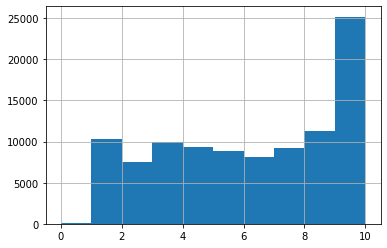

In [8]:
hdf_results["number_of_steps"].hist()

<AxesSubplot:>

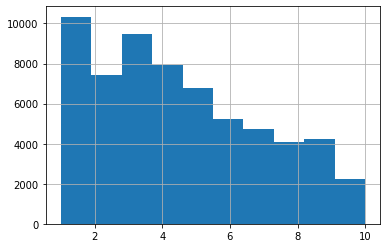

In [9]:
# get solved molecules
solved_molecules = hdf_results[hdf_results["is_solved"] == True]
solved_molecules["number_of_steps"].hist()

## calculate results on desired molecules

In [10]:
dataframe_with_values = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/sascore/generated_molecules/Q99685_sascore_400ep_final_cleaned.csv"
dataframe_with_values = pandas.read_csv(dataframe_with_values)
dataframe_with_values.head()

,LED3CHEMBL200KScorer,XGBClassifier,XGBRegressor,SA,SMILES,clean_smiles,clean_smiles_inchi
0,0.992424,0.149867,6.061453,2.105179,CSc1ccc(CC2CCN(C(=O)c3cccc(C(F)(F)F)c3)CC2)cc1,CSc1ccc(CC2CCN(C(=O)c3cccc(C(F)(F)F)c3)CC2)cc1,InChI=1S/C21H22F3NOS/c1-27-19-7-5-15(6-8-19)13...
1,0.992181,0.409173,6.090014,2.160051,O=C(c1ccc(OCCN2CCCCC2)cc1)N(c1ccccc1)c1cccc(O)c1,O=C(c1ccc(OCCN2CCCCC2)cc1)N(c1ccccc1)c1cccc(O)c1,InChI=1S/C26H28N2O3/c29-24-11-7-10-23(20-24)28...
2,0.473211,0.723250,7.351231,2.943341,CC(C)(C)OC(=O)N1CCN(C(=O)N2CCSCC2)CC1c1ccc(Cl)cc1,CC(C)(C)OC(=O)N1CCN(C(=O)N2CCSCC2)CC1c1ccc(Cl)cc1,"InChI=1S/C20H28ClN3O3S/c1-20(2,3)27-19(26)24-9..."
3,0.999599,0.339404,5.825297,1.753736,O=C(NC1CCN(S(=O)(=O)c2ccc(Cl)cc2)CC1)c1ccccc1,O=C(NC1CCN(S(=O)(=O)c2ccc(Cl)cc2)CC1)c1ccccc1,InChI=1S/C18H19ClN2O3S/c19-15-6-8-17(9-7-15)25...
4,0.978446,0.071252,5.510425,2.711330,O=Cn1nnc(Nc2cc(-c3ccccc3)ccc2O)n1,O=Cn1nnc(Nc2cc(-c3ccccc3)ccc2O)n1,InChI=1S/C14H11N5O2/c20-9-19-17-14(16-18-19)15...


In [11]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == dataframe_with_values["clean_smiles"]).all(), "The target column and clean_smiles columns are not the same"

In [12]:
# get the differences between the target and clean smiles
hdf_results[hdf_results["target"] != dataframe_with_values["clean_smiles"]]

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees


In [13]:
# calculate the inchis for the target column
from rdkit import Chem

def calculate_inchi(smiles):
    mol = Chem.MolFromSmiles(smiles)
    inchi = Chem.MolToInchi(mol)
    return inchi

hdf_results["target_inchi"] = hdf_results["target"].apply(calculate_inchi)

In [14]:
# do a compariosn between the target column and the clean_smiles column on inchi basis because smiles are disambigious
assert (hdf_results["target_inchi"] == dataframe_with_values["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"
hdf_results[hdf_results["target_inchi"] != dataframe_with_values["clean_smiles_inchi"]]
#print the unique length and the normal length of the inchi column
print("The unique length of the inchi column: ", len(hdf_results["target_inchi"].unique()))
print("The normal length of the inchi column: ", len(hdf_results["target_inchi"]))

print("No join possible!")

The unique length of the inchi column:  99992
The normal length of the inchi column:  100000
No join possible!


In [15]:
# add the dataframe_with_values to the hdf_results for the columns LED3Scorer XGBClassifier	XGBRegressor clean_smiles_inchi
hdf_results["LED3CHEMBL200KScorer"] = dataframe_with_values["LED3CHEMBL200KScorer"]
hdf_results["XGBClassifier"] = dataframe_with_values["XGBClassifier"]
hdf_results["XGBRegressor"] = dataframe_with_values["XGBRegressor"]
hdf_results["SA"] = dataframe_with_values["SA"]
hdf_results["clean_smiles_inchi"] = dataframe_with_values["clean_smiles_inchi"]

assert (hdf_results["target_inchi"] == hdf_results["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,policy_used_counts,profiling,top_scores,trees,target_inchi,LED3CHEMBL200KScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi
0,0,CSc1ccc(CC2CCN(C(=O)c3cccc(C(F)(F)F)c3)CC2)cc1,3.213158,3.213095,1,7,6,1,1,1,...,{'uspto': 6},"{'expansion_calls': 6, 'reactants_generations'...","0.9560, 0.6583, 0.6468, 0.5226, 0.5190","[{'type': 'mol', 'hide': False, 'smiles': 'CSc...",InChI=1S/C21H22F3NOS/c1-27-19-7-5-15(6-8-19)13...,0.992424,0.149867,6.061453,2.105179,InChI=1S/C21H22F3NOS/c1-27-19-7-5-15(6-8-19)13...
1,1,O=C(c1ccc(OCCN2CCCCC2)cc1)N(c1ccccc1)c1cccc(O)c1,17.072852,17.072788,8,150,10,9,77,1,...,{'uspto': 149},"{'expansion_calls': 73, 'reactants_generations...","0.9750, 0.6774, 0.6699, 0.6699, 0.6583, 0.6583","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C26H28N2O3/c29-24-11-7-10-23(20-24)28...,0.992181,0.409173,6.090014,2.160051,InChI=1S/C26H28N2O3/c29-24-11-7-10-23(20-24)28...
2,2,CC(C)(C)OC(=O)N1CCN(C(=O)N2CCSCC2)CC1c1ccc(Cl)cc1,33.570369,33.570298,16,195,10,16,43,1,...,{'uspto': 194},"{'expansion_calls': 154, 'reactants_generation...","0.9524, 0.7918, 0.7603, 0.7603, 0.7601, 0.7601","[{'type': 'mol', 'hide': False, 'smiles': 'CC(...","InChI=1S/C20H28ClN3O3S/c1-20(2,3)27-19(26)24-9...",0.473211,0.723250,7.351231,2.943341,"InChI=1S/C20H28ClN3O3S/c1-20(2,3)27-19(26)24-9..."
3,3,O=C(NC1CCN(S(=O)(=O)c2ccc(Cl)cc2)CC1)c1ccccc1,9.213248,9.213175,10,36,5,14,14,1,...,{'uspto': 35},"{'expansion_calls': 31, 'reactants_generations...","0.9634, 0.7565, 0.7565, 0.7491, 0.7491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C18H19ClN2O3S/c19-15-6-8-17(9-7-15)25...,0.999599,0.339404,5.825297,1.753736,InChI=1S/C18H19ClN2O3S/c19-15-6-8-17(9-7-15)25...
4,4,O=Cn1nnc(Nc2cc(-c3ccccc3)ccc2O)n1,900.557028,0.000000,0,3977,10,28,1105,0,...,{'uspto': 3976},"{'expansion_calls': 2972, 'reactants_generatio...","0.8336, 0.8336, 0.8336, 0.8336, 0.8336, 0.8336...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C14H11N5O2/c20-9-19-17-14(16-18-19)15...,0.978446,0.071252,5.510425,2.711330,InChI=1S/C14H11N5O2/c20-9-19-17-14(16-18-19)15...


## confusion matrix

NOTE THESE VALUES ARE FOR THE PREDICTIONS WITH THE LED3CHEMBL200KSCORER WHICH IS NOT USED HERE!!! CAREFUL!!!
The accuracy:  0.7957
The precision:  0.8221953014782556
The recall:  0.8585313520783963
The f1 score:  0.8399705476876802
The mcc:  0.558900964319631


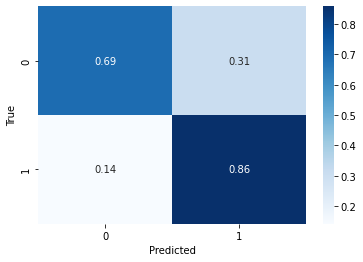

In [16]:
predicted_solved = hdf_results["LED3CHEMBL200KScorer"] > 0.5
solved = hdf_results["is_solved"]

print("NOTE THESE VALUES ARE FOR THE PREDICTIONS WITH THE LED3CHEMBL200KSCORER WHICH IS NOT USED HERE!!! CAREFUL!!!")
# calculate the accuracy
from sklearn.metrics import accuracy_score
print("The accuracy: ", accuracy_score(solved, predicted_solved))

# calculate the precision
from sklearn.metrics import precision_score
print("The precision: ", precision_score(solved, predicted_solved))

# calculate the recall
from sklearn.metrics import recall_score
print("The recall: ", recall_score(solved, predicted_solved))

# calculate the f1 score
from sklearn.metrics import f1_score
print("The f1 score: ", f1_score(solved, predicted_solved))

# calculate the mcc
from sklearn.metrics import matthews_corrcoef
print("The mcc: ", matthews_corrcoef(solved, predicted_solved))

# visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# normalized

confusion_matrix = confusion_matrix(solved, predicted_solved)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, numpy.newaxis]
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# NOTE THESE VALUES ARE FOR THE PREDICTIONS WITH THE LED3CHEMBL200KSCORER WHICH IS NOT USED HERE!!! CAREFUL

In [ ]:
## clustering

In [18]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = hdf_results, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "is_solved", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1

2023-03-29 16:19:18.208 | INFO     | multiretro.data.logic.fingerprints.fingerprints:__init__:18 - Fingerprint Binary Morgan Fingerprint with Radius 2 and 1024 bits using Features: False initialized.
<PATH>/workspace/anaconda/envs/multiretro/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [19]:
print(umapDataFrame.columns)

umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])
print(len(umapDataFrame))
umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'LED3CHEMBL200KScorer', 'XGBClassifier', 'XGBRegressor',
       'SA', 'clean_smiles_inchi', 'fingerprint', 'fingerprint_numpy_array',
       'x', 'y', 'number_of_steps_marker', 'real_index'],
      dtype='object')
100000


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,target_inchi,LED3CHEMBL200KScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,x,y,number_of_steps_marker,real_index
0,0,CSc1ccc(CC2CCN(C(=O)c3cccc(C(F)(F)F)c3)CC2)cc1,3.213158,3.213095,1,7,6,1,1,1,...,InChI=1S/C21H22F3NOS/c1-27-19-7-5-15(6-8-19)13...,0.992424,0.149867,6.061453,2.105179,InChI=1S/C21H22F3NOS/c1-27-19-7-5-15(6-8-19)13...,4.709150,4.846460,13.0,0
1,1,O=C(c1ccc(OCCN2CCCCC2)cc1)N(c1ccccc1)c1cccc(O)c1,17.072852,17.072788,8,150,10,9,77,1,...,InChI=1S/C26H28N2O3/c29-24-11-7-10-23(20-24)28...,0.992181,0.409173,6.090014,2.160051,InChI=1S/C26H28N2O3/c29-24-11-7-10-23(20-24)28...,7.456451,5.278953,17.0,1
2,2,CC(C)(C)OC(=O)N1CCN(C(=O)N2CCSCC2)CC1c1ccc(Cl)cc1,33.570369,33.570298,16,195,10,16,43,1,...,"InChI=1S/C20H28ClN3O3S/c1-20(2,3)27-19(26)24-9...",0.473211,0.723250,7.351231,2.943341,"InChI=1S/C20H28ClN3O3S/c1-20(2,3)27-19(26)24-9...",3.868821,4.954782,11.0,2
3,3,O=C(NC1CCN(S(=O)(=O)c2ccc(Cl)cc2)CC1)c1ccccc1,9.213248,9.213175,10,36,5,14,14,1,...,InChI=1S/C18H19ClN2O3S/c19-15-6-8-17(9-7-15)25...,0.999599,0.339404,5.825297,1.753736,InChI=1S/C18H19ClN2O3S/c19-15-6-8-17(9-7-15)25...,6.972120,8.652215,15.0,3
4,4,O=Cn1nnc(Nc2cc(-c3ccccc3)ccc2O)n1,900.557028,0.000000,0,3977,10,28,1105,0,...,InChI=1S/C14H11N5O2/c20-9-19-17-14(16-18-19)15...,0.978446,0.071252,5.510425,2.711330,InChI=1S/C14H11N5O2/c20-9-19-17-14(16-18-19)15...,13.750481,5.754843,11.0,4


In [1]:
save_path = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/sascore/planning_results/zinc_building_blocks/ZINC_BB_Q99685_SASCORE_results.csv"
#umapDataFrame.to_csv(save_path)

## desired molecules (SA < 4, XGBClassifier > 0.8)

In [21]:
xgb_molecules = hdf_results[hdf_results["XGBClassifier"] > 0.8]
print("The number of molecules with a XGBClassifier score higher than 0.8: ", len(xgb_molecules))

xgb_molecules_solved = xgb_molecules[xgb_molecules["is_solved"] == True]
print("The number of molecules with a XGBClassifier score higher than 0.8 and are solved: ", len(xgb_molecules_solved))

sa_molecules = hdf_results[hdf_results["SA"] < 4]
print("The number of molecules with a SA score lower than 4: ", len(sa_molecules))
short_list = hdf_results[(hdf_results["SA"] < 4) & (hdf_results["XGBClassifier"] > 0.8)]
print("The number of molecules with a SA score lower than 4 and a XGBClassifier score higher than 0.8: ", len(short_list))

short_list_solved = short_list[short_list["is_solved"] == True]
print("The number of molecules with a SA score lower than 4 and a XGBClassifier score higher than 0.8 and are solved: ", len(short_list_solved))

The number of molecules with a XGBClassifier score higher than 0.8:  7689
The number of molecules with a XGBClassifier score higher than 0.8 and are solved:  2851
The number of molecules with a SA score lower than 4:  90564
The number of molecules with a SA score lower than 4 and a XGBClassifier score higher than 0.8:  4958
The number of molecules with a SA score lower than 4 and a XGBClassifier score higher than 0.8 and are solved:  2734


# desired molecules (SA <= 4.5, XGBClassifier > 0.8)

In [2]:
# load the data

import pandas as pd

umapDataFrame = pd.read_csv(save_path)
umapDataFrame.head()

,Unnamed: 0,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,...,target_inchi,LED3CHEMBL200KScorer,XGBClassifier,XGBRegressor,SA,clean_smiles_inchi,x,y,number_of_steps_marker,real_index
0,0,0,CSc1ccc(CC2CCN(C(=O)c3cccc(C(F)(F)F)c3)CC2)cc1,3.213158,3.213095,1,7,6,1,1,...,InChI=1S/C21H22F3NOS/c1-27-19-7-5-15(6-8-19)13...,0.992424,0.149867,6.061453,2.105179,InChI=1S/C21H22F3NOS/c1-27-19-7-5-15(6-8-19)13...,4.709150,4.846460,13.0,0
1,1,1,O=C(c1ccc(OCCN2CCCCC2)cc1)N(c1ccccc1)c1cccc(O)c1,17.072852,17.072788,8,150,10,9,77,...,InChI=1S/C26H28N2O3/c29-24-11-7-10-23(20-24)28...,0.992181,0.409173,6.090014,2.160051,InChI=1S/C26H28N2O3/c29-24-11-7-10-23(20-24)28...,7.456451,5.278953,17.0,1
2,2,2,CC(C)(C)OC(=O)N1CCN(C(=O)N2CCSCC2)CC1c1ccc(Cl)cc1,33.570369,33.570298,16,195,10,16,43,...,"InChI=1S/C20H28ClN3O3S/c1-20(2,3)27-19(26)24-9...",0.473211,0.723250,7.351231,2.943341,"InChI=1S/C20H28ClN3O3S/c1-20(2,3)27-19(26)24-9...",3.868821,4.954782,11.0,2
3,3,3,O=C(NC1CCN(S(=O)(=O)c2ccc(Cl)cc2)CC1)c1ccccc1,9.213248,9.213175,10,36,5,14,14,...,InChI=1S/C18H19ClN2O3S/c19-15-6-8-17(9-7-15)25...,0.999599,0.339404,5.825297,1.753736,InChI=1S/C18H19ClN2O3S/c19-15-6-8-17(9-7-15)25...,6.972120,8.652215,15.0,3
4,4,4,O=Cn1nnc(Nc2cc(-c3ccccc3)ccc2O)n1,900.557028,0.000000,0,3977,10,28,1105,...,InChI=1S/C14H11N5O2/c20-9-19-17-14(16-18-19)15...,0.978446,0.071252,5.510425,2.711330,InChI=1S/C14H11N5O2/c20-9-19-17-14(16-18-19)15...,13.750481,5.754843,11.0,4


In [4]:
xgb_molecules = umapDataFrame[umapDataFrame["XGBClassifier"] > 0.8]
print("The number of molecules with a XGBClassifier score higher than 0.8: ", len(xgb_molecules))

xgb_molecules_solved = xgb_molecules[xgb_molecules["is_solved"] == True]
print("The number of molecules with a XGBClassifier score higher than 0.8 and are solved: ", len(xgb_molecules_solved))

sa_molecules = umapDataFrame[umapDataFrame["SA"] <= 4.5]
print("The number of molecules with a SA score equal or lower than 4.5: ", len(sa_molecules))
short_list = umapDataFrame[(umapDataFrame["SA"] <= 4.5) & (umapDataFrame["XGBClassifier"] > 0.8)]
print("The number of molecules with a SA score lower or equal than 4.5 and a XGBClassifier score higher than 0.8: ", len(short_list))

short_list_solved = short_list[short_list["is_solved"] == True]
print("The number of molecules with a SA score lower or equal 4.5 and a XGBClassifier score higher than 0.8 and are solved: ", len(short_list_solved))

The number of molecules with a XGBClassifier score higher than 0.8:  7689
The number of molecules with a XGBClassifier score higher than 0.8 and are solved:  2851
The number of molecules with a SA score equal or lower than 4.5:  95331
The number of molecules with a SA score lower or equal than 4.5 and a XGBClassifier score higher than 0.8:  6089
The number of molecules with a SA score lower or equal 4.5 and a XGBClassifier score higher than 0.8 and are solved:  2808
